<a href="https://colab.research.google.com/github/ebsmontoy/separate/blob/main/Project_3_Eber_Montoya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program can work right away through Google Colab as all needed libraries are pre-installed.

When using another application for python, make sure to install these libraries:

```
$pip install scikit-learn
$pip install numpy
$pip install pandas
$pip install matplotlib
$pip install seaborn
```
You will also need to download Tensor2.0 from their site.
https://www.tensorflow.org/install

In [7]:
from google.colab import drive
drive.mount('/drive')


Mounted at /drive


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import tensorflow as tf
print(tf.__version__)

2.9.2


In [13]:
data_path = r"/drive/My Drive/Colab Notebooks/train-data.csv"
car_dataset = pd.read_csv(data_path, engine='python')
car_dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [17]:
car_dataset.isnull().mean()

Unnamed: 0           0.000000
Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
New_Price            0.863100
Price                0.000000
dtype: float64

In [19]:
car_dataset = car_dataset.drop(['Unnamed: 0', 'New_Price'], axis = 1)

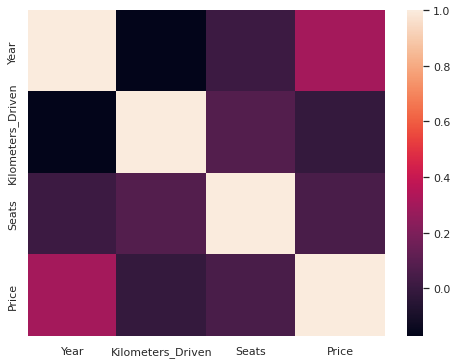

In [20]:
plt.rcParams["figure.figsize"] = [8 , 6]
sns.heatmap(car_dataset.corr())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


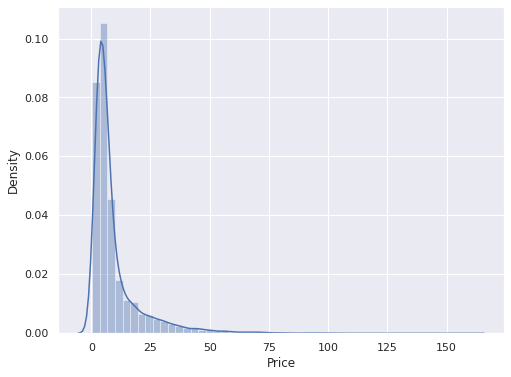

In [21]:
sns.distplot(car_dataset['Price'])

In [22]:
car_dataset.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [23]:
print(car_dataset.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object


In [24]:
numerical_data = car_dataset.drop(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage','Engine', 'Power'], axis=1)
numerical_data.head()

,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74


In [25]:
categorical_data = car_dataset.filter(['Location', 'Fuel_ Type', 'Transmission', 'Owner_Type', 'Mileage','Engine', 'Power'], axis=1)
categorical_data.head()

,Location,Transmission,Owner_Type,Mileage,Engine,Power
0,Mumbai,Manual,First,26.6 km/kg,998 CC,58.16 bhp
1,Pune,Manual,First,19.67 kmpl,1582 CC,126.2 bhp
2,Chennai,Manual,First,18.2 kmpl,1199 CC,88.7 bhp
3,Chennai,Manual,First,20.77 kmpl,1248 CC,88.76 bhp
4,Coimbatore,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp


In [26]:
categorical_data__one_hot = pd.get_dummies(categorical_data, drop_first= True)
categorical_data__one_hot.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
complete_dataset = pd.concat([numerical_data, categorical_data__one_hot], axis=1)
complete_dataset.head()

,Year,Kilometers_Driven,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,2010,72000,5.0,1.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,12.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,4.50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,6.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,17.74,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
complete_dataset.isnull().mean()

Year                  0.000000
Kilometers_Driven     0.000000
Seats                 0.006978
Price                 0.000000
Location_Bangalore    0.000000
                        ...   
Power_98.82 bhp       0.000000
Power_98.96 bhp       0.000000
Power_99 bhp          0.000000
Power_99.6 bhp        0.000000
Power_null bhp        0.000000
Length: 975, dtype: float64

In [29]:
complete_dataset.dropna(inplace = True)

In [30]:
X = complete_dataset.drop(['Price'], axis=1)
y = complete_dataset['Price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [36]:
input_layer = Input(shape=(X.shape[1],))
dense_layer0 = Dense(100, activation='relu')(input_layer)
dense_layer1 = Dense(50, activation='relu')(dense_layer0)
dense_layer2 = Dense(25, activation='relu')(dense_layer1)
dense_layer3 = Dense(10, activation='relu')(dense_layer2)
dense_layer4 = Dense(5, activation='relu')(dense_layer3)
dense_layer5 = Dense(2, activation='relu')(dense_layer4)
output = Dense(1)(dense_layer5)

In [37]:
model = Model(inputs = input_layer, outputs=output)
model.compile(loss="mean_absolute_error", optimizer="adam",metrics=["mean_absolute_error"])

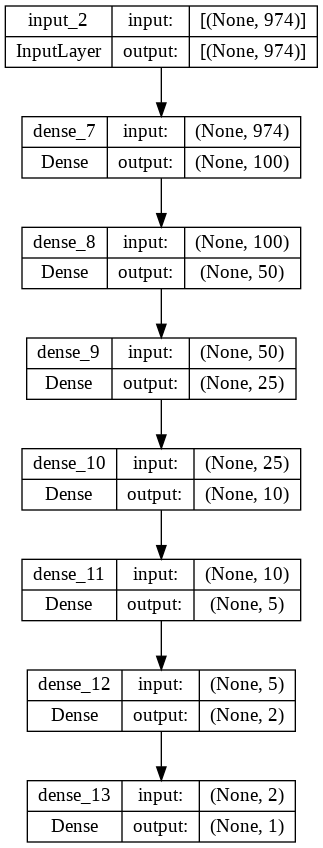

In [38]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [39]:
history = model.fit(X_train, y_train, batch_size=5, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
765/765 [==============================] - 6s 5ms/step - loss: 4.5372 - mean_absolute_error: 4.5372 - val_loss: 2.3793 - val_mean_absolute_error: 2.3793
Epoch 2/5
765/765 [==============================] - 2s 3ms/step - loss: 2.2024 - mean_absolute_error: 2.2024 - val_loss: 2.1012 - val_mean_absolute_error: 2.1012
Epoch 3/5
765/765 [==============================] - 2s 3ms/step - loss: 1.8298 - mean_absolute_error: 1.8298 - val_loss: 1.8582 - val_mean_absolute_error: 1.8582
Epoch 4/5
765/765 [==============================] - 2s 3ms/step - loss: 1.6506 - mean_absolute_error: 1.6506 - val_loss: 1.8208 - val_mean_absolute_error: 1.8208
Epoch 5/5
765/765 [==============================] - 2s 3ms/step - loss: 1.4865 - mean_absolute_error: 1.4865 - val_loss: 1.7959 - val_mean_absolute_error: 1.7959


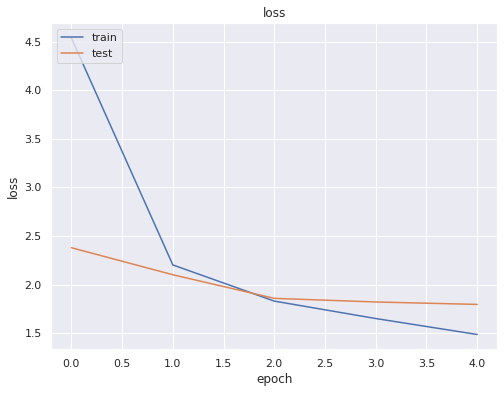

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [41]:
y_pred = model.predict(X_test)

38/38 [==============================] - 0s 2ms/step


In [42]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.7842334075436543
Mean Squared Error: 18.650883764094825
Root Mean Squared Error: 4.318666896635445


In [43]:
car_dataset['Price'].mean()

9.47946835022429

In [44]:
comparison_df = pd.DataFrame({'Actual': y_test.values. tolist(), 'Predicted': y_pred.tolist()})
comparison_df

,Actual,Predicted
0,8.25,[8.381552696228027]
1,5.08,[4.682535171508789]
2,4.50,[7.234955787658691]
3,28.50,[22.331987380981445]
4,7.25,[6.411143779754639]
...,...,...
1191,7.50,[9.71950626373291]
1192,21.67,[22.39077377319336]
1193,4.60,[4.537575721740723]
1194,8.00,[10.55964183807373]


In [45]:
X_test[1].shape

(974,)

In [46]:
single_point = X_test[1].reshape(1,-1)
single_point.shape

(1, 974)

In [47]:
model.predict(X_test[1].reshape(1,-1))

1/1 [==============================] - 0s 21ms/step


array([[4.682534]], dtype=float32)

In [48]:
y_test.values[1]




5.08